In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 


In [2]:
df=pd.read_csv("C:\\Users\\DELL\\Downloads\\CRIME_REVIEW_2021_TO_2024_KARNATAKA.csv")

In [3]:
df.head()

,Sl. No.,ACT,MAJOR HEAD,MINOR HEAD,During the current year upto the end of month under review,During the corresponding month of previous year,During the previous month,During the current month,Month,Year
0,1,A - IPC Crime,Murder (Sec.302/303 IPC),For gain,2.0,3.0,3.0,2,JAN,2021
1,2,A - IPC Crime,Murder (Sec.302/303 IPC),Over Property Dispute,2.0,1.0,1.0,2,JAN,2021
2,3,A - IPC Crime,Murder (Sec.302/303 IPC),Due to Personal Vendetta or enemity,1.0,3.0,3.0,1,JAN,2021
3,4,A - IPC Crime,Murder (Sec.302/303 IPC),Due to Sexual jealousy,1.0,1.0,2.0,1,JAN,2021
4,5,A - IPC Crime,Murder (Sec.302/303 IPC),For dowry by burning,1.0,0.0,1.0,1,JAN,2021


In [4]:
df.shape

(30956, 10)

In [5]:
df.head(100)

,Sl. No.,ACT,MAJOR HEAD,MINOR HEAD,During the current year upto the end of month under review,During the corresponding month of previous year,During the previous month,During the current month,Month,Year
0,1,A - IPC Crime,Murder (Sec.302/303 IPC),For gain,2.0,3.0,3.0,2,JAN,2021
1,2,A - IPC Crime,Murder (Sec.302/303 IPC),Over Property Dispute,2.0,1.0,1.0,2,JAN,2021
2,3,A - IPC Crime,Murder (Sec.302/303 IPC),Due to Personal Vendetta or enemity,1.0,3.0,3.0,1,JAN,2021
3,4,A - IPC Crime,Murder (Sec.302/303 IPC),Due to Sexual jealousy,1.0,1.0,2.0,1,JAN,2021
4,5,A - IPC Crime,Murder (Sec.302/303 IPC),For dowry by burning,1.0,0.0,1.0,1,JAN,2021
...,...,...,...,...,...,...,...,...,...,...
95,96,A - IPC Crime,"RAPE (Sec.376, 376(A) to 376 (D) IPC)",On Minor,0.0,0.0,0.0,0,JAN,2021
96,97,A - IPC Crime,"KIDNAPPING AND ABDUCTION (Sec.360, 361, 363 to...",Missing - Boy,43.0,71.0,35.0,43,JAN,2021
97,98,A - IPC Crime,"KIDNAPPING AND ABDUCTION (Sec.360, 361, 363 to...",Missing - Girl,162.0,104.0,115.0,162,JAN,2021
98,99,A - IPC Crime,"KIDNAPPING AND ABDUCTION (Sec.360, 361, 363 to...",For Ransom - of Children,2.0,3.0,1.0,2,JAN,2021


In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor

In [33]:
try:
  
  import xgboost as xgb
  HAVE_XGB = True
except Exception:
  
  HAVE_XGB = False

In [35]:
RND=42

In [8]:
df.columns.to_list()

['Sl. No.',
 'ACT',
 'MAJOR HEAD',
 'MINOR HEAD',
 'During the current year upto the end of month under review',
 'During the corresponding month of previous year',
 'During the previous month',
 'During the current month',
 'Month',
 'Year']

In [9]:
col_current = 'During the current month'
col_prev_month = 'During the previous month'
col_prev_year = 'During the corresponding month of previous year'

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30956 entries, 0 to 30955
Data columns (total 10 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Sl. No.                                                     30956 non-null  int64  
 1   ACT                                                         30956 non-null  object 
 2   MAJOR HEAD                                                  30952 non-null  object 
 3   MINOR HEAD                                                  27498 non-null  object 
 4   During the current year upto the end of month under review  30871 non-null  float64
 5   During the corresponding month of previous year             30867 non-null  float64
 6   During the previous month                                   30871 non-null  float64
 7   During the current month                                    30865 non-null  object 
 

In [ ]:
## month are in object type 

In [11]:
month_map = {
'JAN':1, 'FEB':2, 'MAR':3, 'APR':4, 'MAY':5, 'JUN':6,
'JUL':7, 'AUG':8, 'SEP':9, 'OCT':10, 'NOV':11, 'DEC':12
}

In [12]:
df['Month'] = df['Month'].astype(str).str.strip().str.upper()
df['Month_num'] = df['Month'].map(month_map)

In [13]:
df.head()

,Sl. No.,ACT,MAJOR HEAD,MINOR HEAD,During the current year upto the end of month under review,During the corresponding month of previous year,During the previous month,During the current month,Month,Year,Month_num
0,1,A - IPC Crime,Murder (Sec.302/303 IPC),For gain,2.0,3.0,3.0,2,JAN,2021,1
1,2,A - IPC Crime,Murder (Sec.302/303 IPC),Over Property Dispute,2.0,1.0,1.0,2,JAN,2021,1
2,3,A - IPC Crime,Murder (Sec.302/303 IPC),Due to Personal Vendetta or enemity,1.0,3.0,3.0,1,JAN,2021,1
3,4,A - IPC Crime,Murder (Sec.302/303 IPC),Due to Sexual jealousy,1.0,1.0,2.0,1,JAN,2021,1
4,5,A - IPC Crime,Murder (Sec.302/303 IPC),For dowry by burning,1.0,0.0,1.0,1,JAN,2021,1


In [16]:
for c in [col_current, col_prev_month, col_prev_year]:
  
  if c in df.columns:
    
  
    df[c] = pd.to_numeric(df[c], errors='coerce')

In [18]:
df.head()

,Sl. No.,ACT,MAJOR HEAD,MINOR HEAD,During the current year upto the end of month under review,During the corresponding month of previous year,During the previous month,During the current month,Month,Year,Month_num
0,1,A - IPC Crime,Murder (Sec.302/303 IPC),For gain,2.0,3.0,3.0,2.0,JAN,2021,1
1,2,A - IPC Crime,Murder (Sec.302/303 IPC),Over Property Dispute,2.0,1.0,1.0,2.0,JAN,2021,1
2,3,A - IPC Crime,Murder (Sec.302/303 IPC),Due to Personal Vendetta or enemity,1.0,3.0,3.0,1.0,JAN,2021,1
3,4,A - IPC Crime,Murder (Sec.302/303 IPC),Due to Sexual jealousy,1.0,1.0,2.0,1.0,JAN,2021,1
4,5,A - IPC Crime,Murder (Sec.302/303 IPC),For dowry by burning,1.0,0.0,1.0,1.0,JAN,2021,1


In [19]:
numeric_cols = [col_current, col_prev_month, col_prev_year]
df[numeric_cols] = df[numeric_cols].fillna(0)

In [20]:
if 'MINOR HEAD' in df.columns:
  
  df['MINOR HEAD'] = df['MINOR HEAD'].fillna('NA')

In [21]:
df = df.dropna(subset=['Month_num','Year'])

In [22]:
le_act = LabelEncoder()
le_major = LabelEncoder()
le_minor = LabelEncoder()

In [23]:
if 'ACT' in df.columns:
 

 df['ACT_enc'] = le_act.fit_transform(df['ACT'].astype(str))
else:
 
 df['ACT_enc'] = 0

In [24]:
if 'MAJOR HEAD' in df.columns:
  
  df['MAJOR_enc'] = le_major.fit_transform(df['MAJOR HEAD'].astype(str))
else:
  

  df['MAJOR_enc'] = 0

In [25]:
if 'MINOR HEAD' in df.columns:
  
  df['MINOR_enc'] = le_minor.fit_transform(df['MINOR HEAD'].astype(str))
else:
  
  df['MINOR_enc'] = 0

In [26]:
key_cols = ['MAJOR HEAD', 'Year', 'Month_num']
base = df.copy()
base['YM'] = base['Year'].astype(int)*100 + base['Month_num'].astype(int)


# Sort
base = base.sort_values(['MAJOR HEAD','Year','Month_num'])


# Ensure numeric target
base['target'] = base[col_current].astype(float)

In [27]:
base['lag_1'] = base.groupby('MAJOR HEAD')['target'].shift(1).fillna(0)
base['lag_12'] = base.groupby('MAJOR HEAD')['target'].shift(12).fillna(0)
# rolling mean 3 months
base['rmean_3'] = base.groupby('MAJOR HEAD')['target'].rolling(window=3, min_periods=1).mean().reset_index(level=0, drop=True)


# Replace any remaining NaN
base = base.fillna(0)

In [28]:
# %% 6) Features and target
features = [
'Month_num', 'Year',
col_prev_month, col_prev_year,
'ACT_enc','MAJOR_enc','MINOR_enc',
'lag_1','lag_12','rmean_3'
]


X = base[features]
y = base['target']


print('Feature sample:')
print(X.head())

Feature sample:
      Month_num  Year  During the previous month  \
5945          9  2021                        5.0   
5946          9  2021                       18.0   
5947          9  2021                        3.0   
5948          9  2021                        0.0   
5949          9  2021                      143.0   

      During the corresponding month of previous year  ACT_enc  MAJOR_enc  \
5945                                              8.0        7          0   
5946                                             20.0        7          0   
5947                                              1.0        7          0   
5948                                              4.0        7          0   
5949                                             88.0        7          0   

      MINOR_enc  lag_1  lag_12    rmean_3  
5945        398    0.0     0.0   4.000000  
5946        569    4.0     0.0  10.500000  
5947        361   17.0     0.0   7.000000  
5948        447    0.0     0.0  

In [29]:
X = base[features]
y = base['target']


print('Feature sample:')
print(X.head())

Feature sample:
      Month_num  Year  During the previous month  \
5945          9  2021                        5.0   
5946          9  2021                       18.0   
5947          9  2021                        3.0   
5948          9  2021                        0.0   
5949          9  2021                      143.0   

      During the corresponding month of previous year  ACT_enc  MAJOR_enc  \
5945                                              8.0        7          0   
5946                                             20.0        7          0   
5947                                              1.0        7          0   
5948                                              4.0        7          0   
5949                                             88.0        7          0   

      MINOR_enc  lag_1  lag_12    rmean_3  
5945        398    0.0     0.0   4.000000  
5946        569    4.0     0.0  10.500000  
5947        361   17.0     0.0   7.000000  
5948        447    0.0     0.0  

In [30]:
train_mask = base['Year'] <= 2023
test_mask = base['Year'] == 2024


X_train, y_train = X[train_mask], y[train_mask]
X_test, y_test = X[test_mask], y[test_mask]


print('Train rows:', X_train.shape[0], 'Test rows:', X_test.shape[0])

Train rows: 22490 Test rows: 8466


In [38]:
if HAVE_XGB:
  
  print('Training XGBRegressor...')
  model = xgb.XGBRegressor(random_state=RND, n_estimators=200, max_depth=6, learning_rate=0.1,early_stopping_rounds=20)
  model.fit(X_train, y_train, eval_set=[(X_test,y_test)],verbose=False)
else:
   
  print('XGBoost not available, training RandomForestRegressor...')
  model = RandomForestRegressor(n_estimators=200, random_state=RND, n_jobs=-1)
  model.fit(X_train, y_train)

Training XGBRegressor...


In [39]:
pred = model.predict(X_test)

In [37]:
import xgboost as xgb
print(xgb.__version__)

3.0.4


In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [42]:
pred = model.predict(X_test)


def mape(y_true, y_pred):
  
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  mask = y_true!=0
  return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask]))*100 if mask.sum()>0 else np.nan


mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))
mape_v = mape(y_test, pred)


print(f'MAE: {mae:.3f}, RMSE: {rmse:.3f}, MAPE: {mape_v:.2f}%')

MAE: 5.379, RMSE: 29.176, MAPE: 55.32%


Sample MAJOR HEAD for plot:     E. CRIME AGAINST SCHEDULED CASTES /TRIBES BY NON SCs/STs 



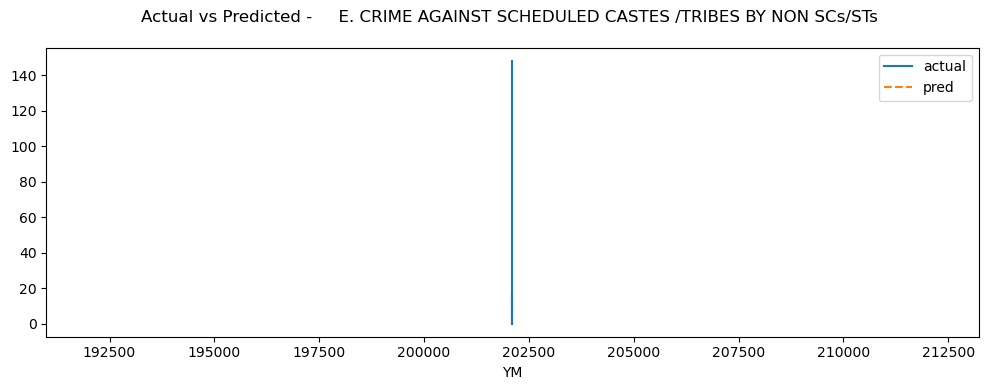

In [43]:
sample_head = base['MAJOR HEAD'].unique()[0]
print('Sample MAJOR HEAD for plot:', sample_head)


sub = base[base['MAJOR HEAD']==sample_head].copy()
sub['pred'] = np.nan
sub.loc[test_mask & (base['MAJOR HEAD']==sample_head), 'pred'] = model.predict(X_test[base['MAJOR HEAD'][test_mask]==sample_head]) if HAVE_XGB or True else np.nan


plt.figure(figsize=(10,4))
plt.plot(sub['YM'], sub['target'], label='actual')
plt.plot(sub['YM'], sub['pred'], label='pred', linestyle='--')
plt.title(f'Actual vs Predicted - {sample_head}')
plt.xlabel('YM'); plt.legend(); plt.tight_layout()
plt.show()

In [45]:
try:
  
  if HAVE_XGB:
   
   imp = model.feature_importances_

  else:
    


    imp = model.feature_importances_

    fi = pd.Series(imp, index=features).sort_values(ascending=False)
    print(fi)
    fi.plot(kind='bar', figsize=(8,4)); plt.tight_layout(); plt.show()
except Exception as e:
     

     print('Could not compute feature importance:', e)

In [46]:
import joblib

In [48]:
OUT_MODEL = '/mnt/data/crime_rate_model.pkl'
joblib.dump({'model':model,'le_act':le_act,'le_major':le_major,'le_minor':le_minor,'features':features}, OUT_MODEL)
print('Saved model to', OUT_MODEL)

Saved model to /mnt/data/crime_rate_model.pkl


In [49]:
example = X_test.iloc[0:1].copy()
print('Example features for prediction:\n', example)
print('Predicted next-month crime count:', model.predict(example)[0])

Example features for prediction:
        Month_num  Year  During the previous month  \
22711          1  2024                        0.0   

       During the corresponding month of previous year  ACT_enc  MAJOR_enc  \
22711                                              0.0        7          2   

       MINOR_enc  lag_1  lag_12   rmean_3  
22711         44    1.0     0.0  0.333333  
Predicted next-month crime count: 0.096696876
